In [5]:
import dataloader
import matplotlib.pyplot as plt

In [3]:
data_path = "C:\\Users\\zxk\\Desktop\\251B\\class-proj\\ucsd-cse-251b-class-competition\\train\\train"
city_idx_path = "C:\\Users\\zxk\\Desktop\\251B\\class-proj\\ucsd-cse-251b-class-competition\\"
batch_size = 4
MIA_train_loader,PIT_train_loader,MIA_valid_loader,PIT_valid_loader,MIA_train_dataset,PIT_train_dataset,MIA_valid_dataset,PIT_valid_dataset = dataloader.loadData(data_path,city_idx_path,batch_size,split=0.9,cutoff=None)

Read City File


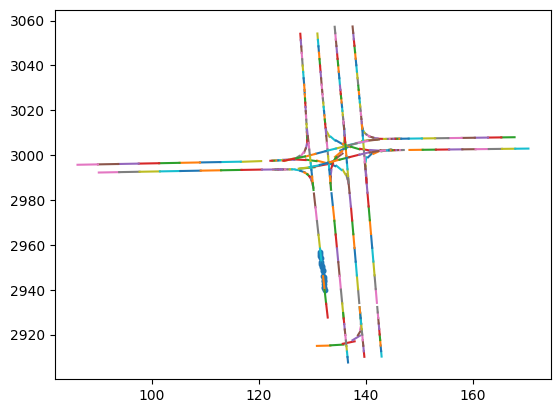

In [6]:
scene_idx = 999
car_idx = 2
sample = MIA_train_dataset[scene_idx]

for i in range(len(sample["lane"])):
    x0,y0 = sample["lane"][i]
    vx,vy = sample["lane_norm"][i]
    # print(vx,vy)
    plt.plot([x0-vx/2,x0+vx/2],[y0-vy/2,y0+vy/2])

plt.scatter(sample["p_in"][car_idx,:,0],sample["p_in"][car_idx,:,1],s = 10)